### Preprocesado de datos

In [2]:
import pandas as pd

# Datos obtenidos de https://databank.worldbank.org/reports.aspx?source=world-development-indicators#
with open ("datos.csv", "r") as f:
    lineas = f.read().splitlines()
    rangoDeLineas = lineas[:85]

with open("preprocesado.csv", "w") as f:
    for linea in rangoDeLineas:
        f.write(linea + "\n")

#Leer datos
df = pd.read_csv("preprocesado.csv", sep =",")
#Limpieza de datos
df = df.drop(columns=["Series Code", "Country Code"], errors="ignore")
df.columns = ['País', 'Indicador', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df

,País,Indicador,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Panama,Access to electricity (% of population),86.9,88.6,89.300000,89.1,90.800000,91.6,92.4,93.7,93.8,93.9,95.3,95.3,95
1,Panama,Adjusted net national income per capita (curre...,7015.42519401087,8352.88381575184,9470.203419,10522.9611933459,11017.875258,11982.0392200809,12440.2690508819,13242.292985116,13217.7100307791,13342.468707283,10887.5910897658,11830.9871827426,..
2,Panama,Current health expenditure per capita (current...,608.2467041,665.84649658,725.863770,806.58551025,920.076599,982.79394531,1057.40661621,1127.68896484,1228.07336426,1340.13781738,1358.09069824,1415.24499512,..
3,Panama,"Employment to population ratio, 15+, total (%)...",59.391,59.077,60.790000,61.487,60.933000,60.898,60.851,60.06,61.463,61.817,51.296,53.504,57.727
4,Panama,GDP per capita (current US$),8124.55830734871,9403.43990821634,10767.293179,11932.2862205866,12837.247958,13669.5594424097,14382.2323819969,15185.9724813803,16156.0742859681,16472.8317470488,13293.3331951688,15491.2898013383,17357.6286293985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Belize,"Labor force, total",128753,133836,138977.000000,144234,151065.000000,156821,162580,166748,170728,174493,172620,177472,185068
80,Belize,"Life expectancy at birth, total (years)",72.272,72.651,73.245000,73.666,73.311000,73.187,73.399,73.562,73.703,73.931,72.854,70.47,70.962
81,Belize,Net migration,1644,1583,1529.000000,1504,1452.000000,1363,1283,1222,1185,1164,0,577,600
82,Belize,People using at least basic sanitation service...,85.6277083290934,85.9422379234594,86.257854,86.5747585957408,86.893045,87.2129807113852,87.534777016108,87.8585217818837,88.184416079473,88.1985036524971,88.2142766873075,88.23173186587,88.2510779331487


In [3]:
''' TAREAS PARA EL PROYECTO:
Un DataFrame por Indicador:
Bryan
	'Access to electricity (% of population)',
    'Adjusted net national income per capita (current US$)'
Jaime
	'Current health expenditure per capita (current US$)',
	'Employment to population ratio, 15+, total (%) (national estimate)',
Nery
	'GDP per capita (current US$)',
	'Industry (including construction), value added (% of GDP)',
Maria Jose
	'Labor force with advanced education (% of total working-age population with advanced education)',
	'Labor force, total', 
	'Life expectancy at birth, total (years)',
Karen
	'Net migration',
	'People using at least basic sanitation services (% of population)',
	'Population density (people per sq. km of land area)'

2. HACER LOS SIGUIENTES GRAFICOS PARA CADA INDICADOR:
1. Barras
2. 
'''
cantidadIndicadores = len(df['Indicador'].unique()) # cantidad de indicadores
cantidadIndicadores, df['Indicador'].unique() # imprime los indicadores

(12,
 array(['Access to electricity (% of population)',
        'Adjusted net national income per capita (current US$)',
        'Current health expenditure per capita (current US$)',
        'Employment to population ratio, 15+, total (%) (national estimate)',
        'GDP per capita (current US$)',
        'Industry (including construction), value added (% of GDP)',
        'Labor force with advanced education (% of total working-age population with advanced education)',
        'Labor force, total', 'Life expectancy at birth, total (years)',
        'Net migration',
        'People using at least basic sanitation services (% of population)',
        'Population density (people per sq. km of land area)'],
       dtype=object))

### Bryan

### Jaime

### Nery

### Maria Jose

### Karen
- Indicador: 'Net migration'

In [4]:
# seleccionar las filas que contienen el indicador "Net migration"
dfNetMigration = df[df['Indicador'].str.contains('Net migration')]
# eliminar la columna indicador
dfNetMigration = dfNetMigration.drop(columns=['Indicador'])
# elegimos la columna "País" como index y eliminamos la columna "País"
dfNetMigration.set_index('País', inplace=True)
# mostramos los datos
dfNetMigration

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,4953,5167,5447.0,5926,7105.0,8648,10109,11059,11130,10623,5473,5473,7967
Costa Rica,4728,4258,3983.0,3950,3996.0,4065,4150,4196,4198,4154,2084,2084,3850
El Salvador,-54686,-53440,-50554.0,-49086,-49130.0,-51282,-47499,-50616,-54158,-55143,-25214,-27343,-23249
Guatemala,-36072,-33204,-32572.0,-35666,-40409.0,-48162,-39266,-48049,-56884,-58095,-23142,-29118,-9128
Honduras,-5418,-5664,-5896.0,-6094,-6302.0,-6512,-6685,-6782,-6768,-6550,-6199,-5779,-5374
Nicaragua,-29081,-28224,-27388.0,-26589,-25571.0,-24359,-23081,-21841,-20739,-19733,-10384,-10384,-8000
Belize,1644,1583,1529.0,1504,1452.0,1363,1283,1222,1185,1164,0,577,600


In [5]:
#convertir los datos de tipo objeto a tipo float
dfNetMigration = dfNetMigration.astype(float)
dfNetMigration

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,4953.0,5167.0,5447.0,5926.0,7105.0,8648.0,10109.0,11059.0,11130.0,10623.0,5473.0,5473.0,7967.0
Costa Rica,4728.0,4258.0,3983.0,3950.0,3996.0,4065.0,4150.0,4196.0,4198.0,4154.0,2084.0,2084.0,3850.0
El Salvador,-54686.0,-53440.0,-50554.0,-49086.0,-49130.0,-51282.0,-47499.0,-50616.0,-54158.0,-55143.0,-25214.0,-27343.0,-23249.0
Guatemala,-36072.0,-33204.0,-32572.0,-35666.0,-40409.0,-48162.0,-39266.0,-48049.0,-56884.0,-58095.0,-23142.0,-29118.0,-9128.0
Honduras,-5418.0,-5664.0,-5896.0,-6094.0,-6302.0,-6512.0,-6685.0,-6782.0,-6768.0,-6550.0,-6199.0,-5779.0,-5374.0
Nicaragua,-29081.0,-28224.0,-27388.0,-26589.0,-25571.0,-24359.0,-23081.0,-21841.0,-20739.0,-19733.0,-10384.0,-10384.0,-8000.0
Belize,1644.0,1583.0,1529.0,1504.0,1452.0,1363.0,1283.0,1222.0,1185.0,1164.0,0.0,577.0,600.0


In [47]:
#cambiar filas por columnas de un dataframe
dfNetMigration.T

País,Panama,Costa Rica,El Salvador,Guatemala,Honduras,Nicaragua,Belize
2010,4953.0,4728.0,-54686.0,-36072.0,-5418.0,-29081.0,1644.0
2011,5167.0,4258.0,-53440.0,-33204.0,-5664.0,-28224.0,1583.0
2012,5447.0,3983.0,-50554.0,-32572.0,-5896.0,-27388.0,1529.0
2013,5926.0,3950.0,-49086.0,-35666.0,-6094.0,-26589.0,1504.0
2014,7105.0,3996.0,-49130.0,-40409.0,-6302.0,-25571.0,1452.0
2015,8648.0,4065.0,-51282.0,-48162.0,-6512.0,-24359.0,1363.0
2016,10109.0,4150.0,-47499.0,-39266.0,-6685.0,-23081.0,1283.0
2017,11059.0,4196.0,-50616.0,-48049.0,-6782.0,-21841.0,1222.0
2018,11130.0,4198.0,-54158.0,-56884.0,-6768.0,-20739.0,1185.0
2019,10623.0,4154.0,-55143.0,-58095.0,-6550.0,-19733.0,1164.0


<Axes: title={'center': 'Mean Net Migration'}, xlabel='País', ylabel='Net Migration Mean'>

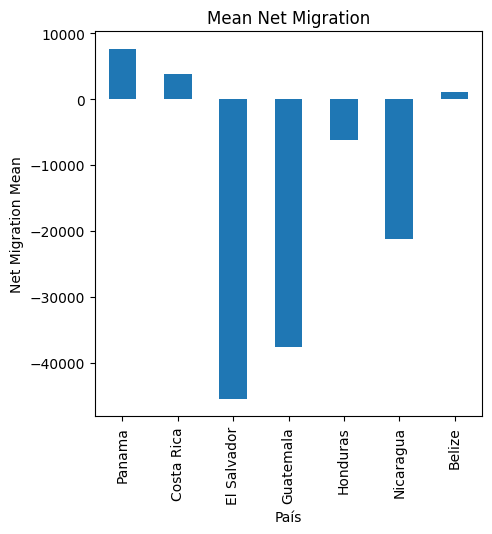

In [48]:
import matplotlib.pyplot as plt
dfNetMigMean = dfNetMigration.T.mean() #cambiamos filas por columnas y calculamos la media de cada país
#grafico de barras
dfNetMigMean.plot(kind='bar', title='Mean Net Migration', figsize=(5,5), xlabel='País', ylabel='Net Migration Mean')

<Axes: >

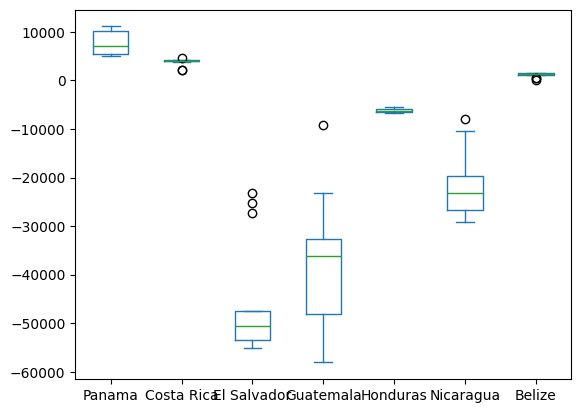

In [42]:
#grafico de caja
dfNetMigMean.plot(kind='box') 

<Axes: ylabel='Frequency'>

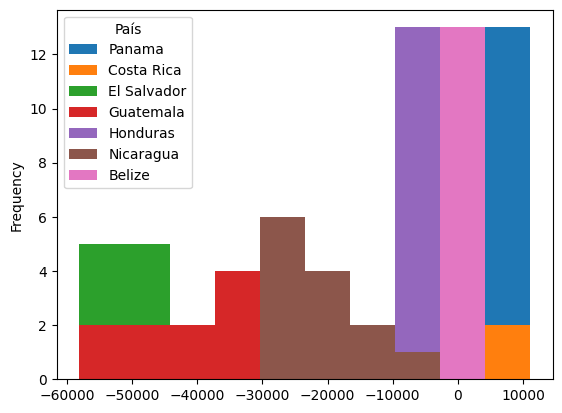

In [43]:
#Histograma
dfNetMigMean.plot(kind='hist') 

- 	'People using at least basic sanitation services (% of population)'

- 'Population density (people per sq. km of land area)'